In [1]:
import pandas as pd 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
internat_read = os.path.join("..", "data", "cleandata", "master.csv")
internat_read = pd.read_csv(internat_read)
# internat_read.info()
internat_read.head(2)      
## 27820 rows:  101countries; 6agegroups, 2genders, 32yrs (missing years!)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [3]:
internat_read = internat_read.drop(["country-year", "HDI for year"], axis=1)
internat_drop = pd.DataFrame(internat_read)
internat_drop.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers


In [4]:
# internat_drop.info()         # 27820 entries, 12 columns, data types appropriate
# COLS1: country; year; sex; age; suicides_no; population; suicides/100k pop; 
# COLS2: country-year; HDI for year; gdp_for_year ($); gdp_per_capita ($); generation
# country_set=set()
# year_set=set()
# age_set=set()
# generation_set=set()
# for i in range(len(internat_drop)):
#     country_set.add(internat_drop.loc[i, "country"])
#     year_set.add(internat_drop.loc[i, "year"])
#     age_set.add(internat_drop.loc[i, "age"])
#     generation_set.add(internat_drop.loc[i, "generation"])
# print(country_set)            ## 101 countries -- want to match the 38 in other dataset.
# print(year_set)               ## 1985 - 2016, but missing value after 2014


In [5]:
# row_drop = ['Qatar', 'Kazakhstan', 'Malta', 'Suriname', 'Serbia', \
#             'Ukraine', 'Latvia', 'Belarus', 'Kiribati', 'Bahamas', \
#             'Fiji', 'Cabo Verde', 'Kyrgyzstan', 'United Arab Emirates', \
#             'Saint Lucia', 'Russian Federation', 'Paraguay', \
#             'Bosnia and Herzegovina', 'Romania', 'Nicaragua', \
#             'Montenegro', 'Guatemala', 'Dominica', 'Bulgaria', \
#             'Barbados', 'Turkmenistan', 'Trinidad and Tobago', \
#             'Macau', 'Maldives', 'Uruguay', 'Saint Kitts and Nevis', \
#             'Oman', 'Bahrain', 'Puerto Rico', 'Argentina', \
#             'El Salvador', 'Grenada', 'Ecuador', 'Philippines', \
#             'Sri Lanka', 'Antigua and Barbuda', 'Mauritius', \
#             'Mongolia', 'San Marino', 'Azerbaijan', 'Belize', \
#             'Georgia', 'Guyana', 'Cuba', 'Aruba', 'Armenia', \
#             'Saint Vincent and Grenadines', 'Panama', 'Seychelles', \
#             'New Zealand', 'Uzbekistan', 'Cyprus', 'Singapore', \
#             'Thailand', 'Jamaica', 'Albania', 'Croatia', 'Kuwait']
# for i in range(len(internat_drop)):
#     for k in range(len(row_drop)):
#         if internat_drop.loc[i, "country"] == row_drop[k]:
#              internat_drop.drop(internat_drop.index[[i]])
# internat_drop.head()

In [6]:
# row_keep = {"Australia", "Austria", "Belgium", "Canada", "Chile", \
#             "Czech Republic", "Denmark", "Estonia", "Finland", "France", \
#             "Germany", "Greece", "Hungary", "Iceland", "Ireland", \
#             "Israel", "Italy", "Japan", "Korea", "Latvia", "Lithuania", \
#             "Luxembourg", "Mexico", "Netherlands", "New Zealand", \
#             "Norway", "Poland", "Portugal", "Slovak Republic", "Slovenia", \
#             "Spain", "Switzerland", "Turkey", "United Kingdom", \
#             "United States"}
# internat_drop[internat_drop.rows[internat_drop.isin([row_keep]).all()]]
# internat_drop.head()

In [7]:
US_data = internat_drop [internat_drop['country'] == 'United States']
US_data = US_data.sort_values('age')
US_data.head(50)                      # 372 rows × 12 columns

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
26953,United States,1993,female,15-24 years,730,17630000,4.14,"6,878,718,000,000",28891,Generation X
26984,United States,1996,male,15-24 years,3724,18617800,20.00,"8,100,201,000,000",32928,Generation X
27116,United States,2007,male,15-24 years,3481,22014323,15.81,"14,477,635,000,000",51585,Millenials
27176,United States,2012,male,15-24 years,3918,22713083,17.25,"16,155,255,000,000",55170,Millenials
26905,United States,1989,female,15-24 years,764,18055000,4.23,"5,657,693,000,000",24654,Generation X
26989,United States,1996,female,15-24 years,634,17604000,3.60,"8,100,201,000,000",32928,Generation X
27109,United States,2006,female,15-24 years,661,20590472,3.21,"13,855,888,000,000",49666,Millenials
26900,United States,1989,male,15-24 years,4106,18459000,22.24,"5,657,693,000,000",24654,Generation X
26996,United States,1997,male,15-24 years,3559,18805800,18.93,"8,608,515,000,000",34644,Generation X
27180,United States,2012,female,15-24 years,954,21653970,4.41,"16,155,255,000,000",55170,Millenials


In [8]:
US_data_male = US_data[US_data['sex'] == "male"]
US_data_female = US_data[US_data['sex'] == "female"]

US_data_male_1985 = US_data_male[US_data_male['year'] == 1985]
US_data_male_2015 = US_data_male[US_data_male['year'] == 2015]

US_data_female_1985 = US_data_female[US_data_female['year'] == 1985]
US_data_female_2015 = US_data_female[US_data_female['year'] == 2015]

In [10]:
US_data_male_1985

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
26852,United States,1985,male,15-24 years,4267,19962000,21.38,"4,346,734,000,000",19693,Generation X
26850,United States,1985,male,25-34 years,5134,20986000,24.46,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,"4,346,734,000,000",19693,Silent
26858,United States,1985,male,5-14 years,205,17370000,1.18,"4,346,734,000,000",19693,Generation X
26849,United States,1985,male,55-74 years,5302,17971000,29.50,"4,346,734,000,000",19693,G.I. Generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,"4,346,734,000,000",19693,G.I. Generation


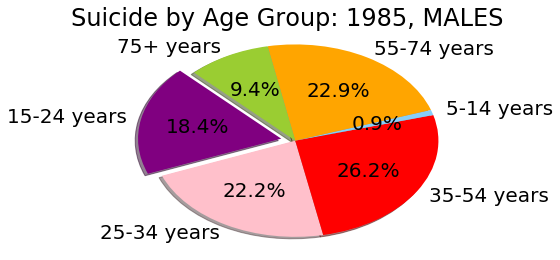

In [34]:
# pie plots to compare male suicides 30yrs apart, and male:female rates.
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
labels = ("15-24 years","25-34 years","35-54 years","5-14 years","55-74 years","75+ years")
explode = (0.1, 0, 0, 0, 0, 0)
sizes = US_data_male_1985["suicides_no"]
labels = US_data_male_1985["age"]
colors = ["purple", "pink", "red", "lightskyblue", "orange", "yellowgreen"]
plt.title("Suicide by Age Group: 1985, MALES")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("auto")
path_PiMa1985 = os.path.join("..", "Images", "US_male1985.png")
plt.savefig(path_PiMa1985, bbox_inches="tight")


In [12]:
US_data_female_1985

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
26857,United States,1985,female,15-24 years,854,19589000,4.36,"4,346,734,000,000",19693,Generation X
26856,United States,1985,female,25-34 years,1242,21041000,5.90,"4,346,734,000,000",19693,Boomers
26853,United States,1985,female,35-54 years,2105,27763000,7.58,"4,346,734,000,000",19693,Silent
26859,United States,1985,female,5-14 years,73,16553000,0.44,"4,346,734,000,000",19693,Generation X
26854,United States,1985,female,55-74 years,1568,21366000,7.34,"4,346,734,000,000",19693,G.I. Generation
26855,United States,1985,female,75+ years,466,7469000,6.24,"4,346,734,000,000",19693,G.I. Generation


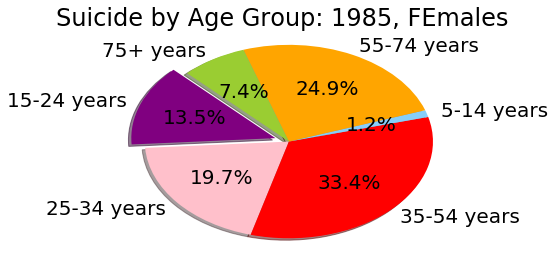

In [31]:
# plot FEmales for 1985; then Male rates for 2015, then females for 2015.
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
labels = ("15-24 years","25-34 years","35-54 years","5-14 years","55-74 years","75+ years")
explode = (0.1, 0, 0, 0, 0, 0)
sizes = US_data_female_1985["suicides_no"]
labels = US_data_female_1985["age"]
colors = ["purple", "pink", "red", "lightskyblue", "orange", "yellowgreen"]
plt.title("Suicide by Age Group: 1985, FEmales")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("auto")
path_PiFe1985 = os.path.join("..", "Images", "US_FEmale1985.png")
plt.savefig(path_PiFe1985, bbox_inches="tight")

In [14]:
US_data_male_2015 

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
27212,United States,2015,male,15-24 years,4359,22615073,19.27,"18,120,714,000,000",60387,Millenials
27211,United States,2015,male,25-34 years,5503,22137097,24.86,"18,120,714,000,000",60387,Millenials
27210,United States,2015,male,35-54 years,11634,41658010,27.93,"18,120,714,000,000",60387,Generation X
27218,United States,2015,male,5-14 years,255,21273987,1.20,"18,120,714,000,000",60387,Generation Z
27209,United States,2015,male,55-74 years,9068,32264697,28.11,"18,120,714,000,000",60387,Boomers
27208,United States,2015,male,75+ years,3171,8171136,38.81,"18,120,714,000,000",60387,Silent


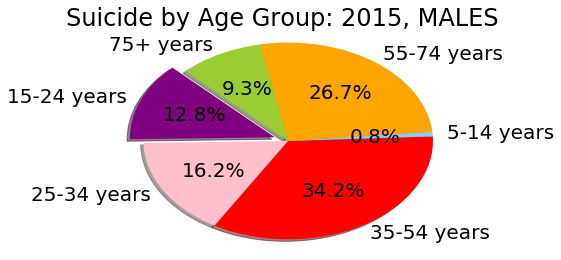

In [32]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
labels = ("15-24 years","25-34 years","35-54 years","5-14 years","55-74 years","75+ years")
explode = (0.1, 0, 0, 0, 0, 0)
sizes = US_data_male_2015["suicides_no"]
labels = US_data_male_2015["age"]
colors = ["purple", "pink", "red", "lightskyblue", "orange", "yellowgreen"]
plt.title("Suicide by Age Group: 2015, MALES")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("auto")
path_PiMa2015 = os.path.join("..", "Images", "US_male2015.png")
plt.savefig(path_PiMa2015, bbox_inches="tight")

In [16]:
US_data_female_2015 

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
27216,United States,2015,female,15-24 years,1132,21633813,5.23,"18,120,714,000,000",60387,Millenials
27215,United States,2015,female,25-34 years,1444,21555712,6.70,"18,120,714,000,000",60387,Millenials
27213,United States,2015,female,35-54 years,4053,41531809,9.76,"18,120,714,000,000",60387,Generation X
27219,United States,2015,female,5-14 years,158,20342901,0.78,"18,120,714,000,000",60387,Generation Z
27214,United States,2015,female,55-74 years,2872,35115610,8.18,"18,120,714,000,000",60387,Boomers
27217,United States,2015,female,75+ years,540,11778666,4.58,"18,120,714,000,000",60387,Silent


In [1]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}
plt.rc('font', **font)
labels = ("15-24 years","25-34 years","35-54 years","5-14 years","55-74 years","75+ years")
explode = (0.1, 0, 0, 0, 0, 0)
sizes = US_data_female_2015["suicides_no"]
labels = US_data_female_2015["age"]
colors = ["purple", "pink", "red", "lightskyblue", "orange", "yellowgreen"]
plt.title("Suicide by Age Group: 2015, FEmales")
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=135)
plt.axis("auto")
path_PiFe2015 = os.path.join("..", "Images", "US_FEmale2015.png")
plt.savefig(path_PiFe2015, bbox_inches="tight")

NameError: name 'US_data_female_2015' is not defined